In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.max_rows', None, 'display.max_columns', 500)


In [54]:
df = pd.read_csv('./LA_data/air_walk_merged_LA.csv')


In [55]:
#seperating inside and outside monitor readings
dfout = df[df['location_type'] == 'outside']
dfin = df[df['location_type'] != 'outside']

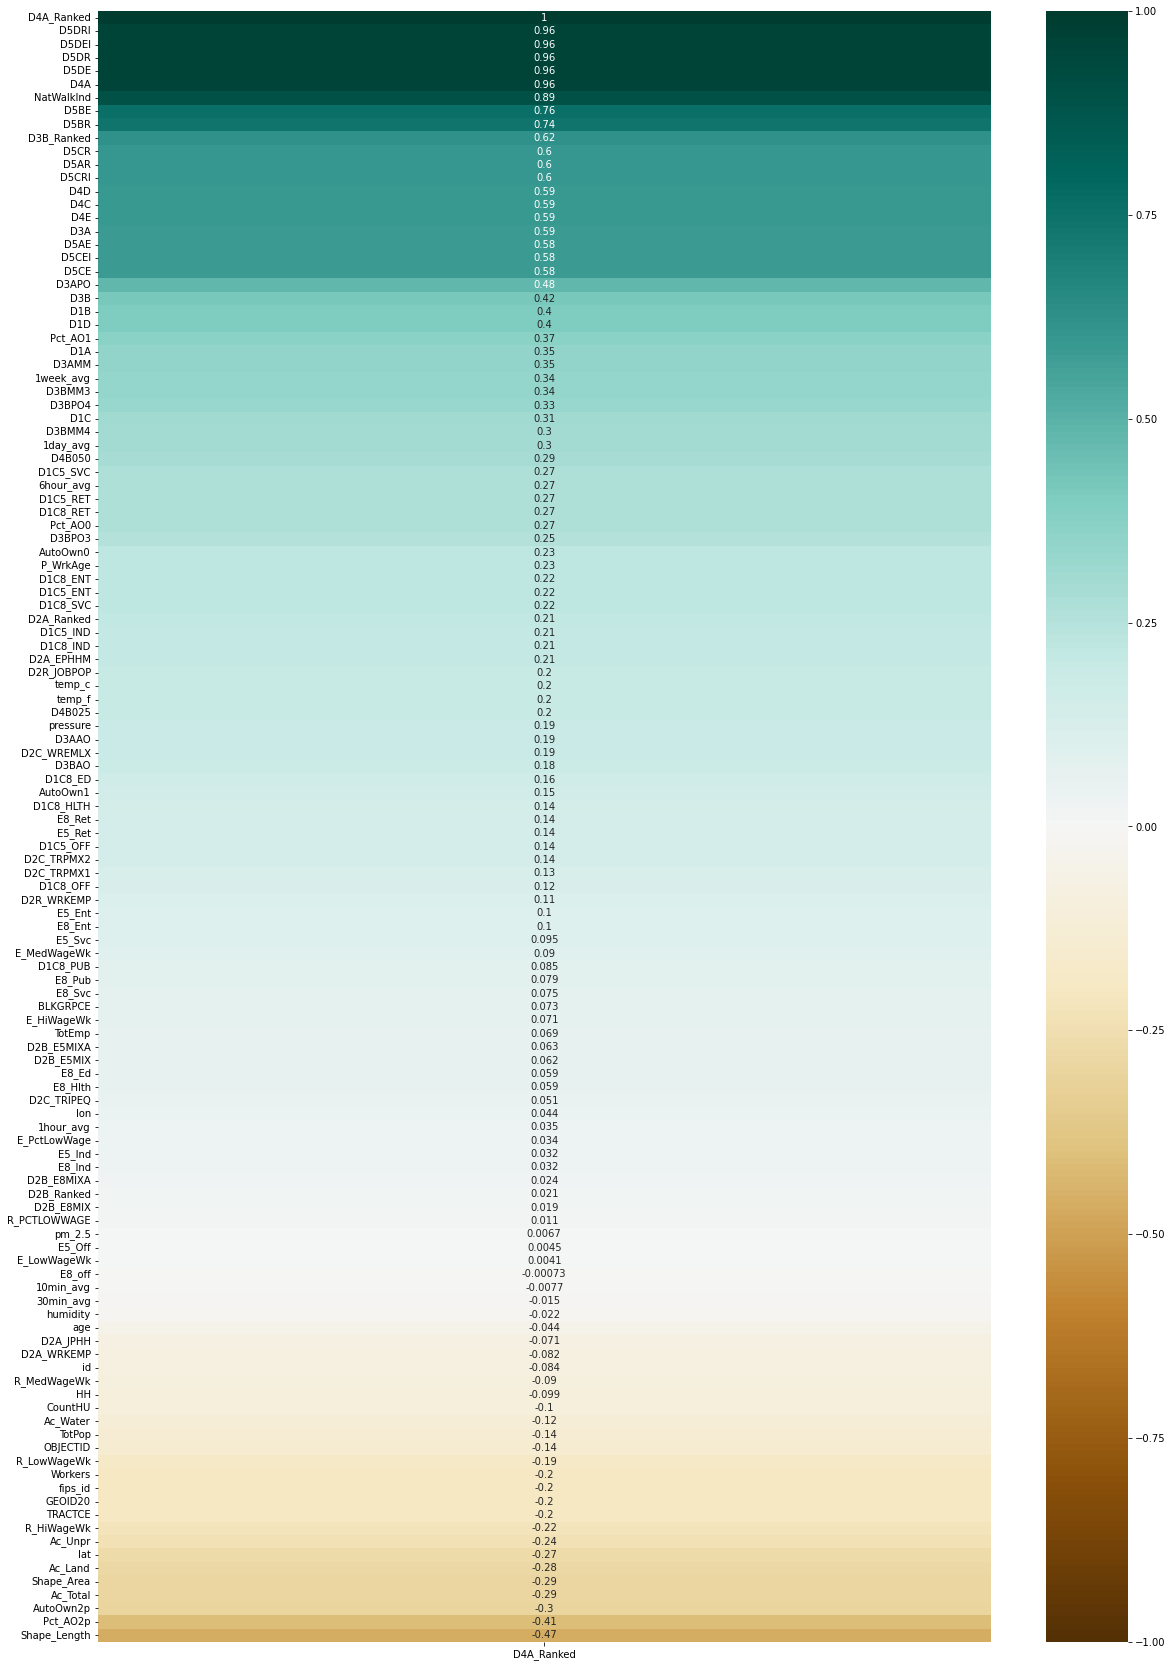

In [220]:
plt.figure(figsize=(20, 30))
heatmap = sns.heatmap(dfout.corr()[['D4A_Ranked']].sort_values(
    by='D4A_Ranked', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


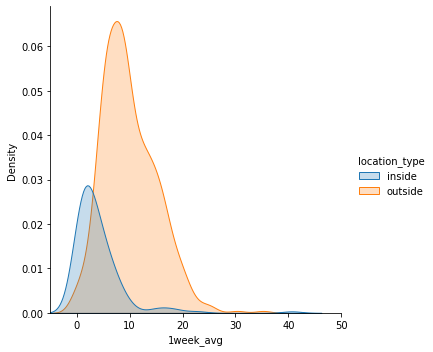

In [57]:
ax = sns.displot(df, x="1week_avg", hue="location_type", kind="kde", fill=True)
ax.set(xlim=(-5, 50))


In [224]:
dfout.head()

,id,lat,lon,name,pm_2.5,temp_f,temp_c,humidity,pressure,last_seen,model,age,10min_avg,30min_avg,1hour_avg,6hour_avg,1day_avg,1week_avg,fips_id,OBJECTID,GEOID20,TRACTCE,BLKGRPCE,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
2,95367,34.138150,-118.009264,1230 S Mayflower (Outside),0.30,103.0,39.444444,3.0,1003.45,2022-02-12 21:41:08,PMS5003+PMS5003+BME280,0,0.68,1.11,1.32,3.78,4.22,9.61,60374309011,48853,6.037431e+10,430901,1,111.226876,0.0,111.226876,111.226876,1509,593.0,548.0,0.654,16,0.029197,252,0.459854,280,0.510949,840,198,280,362,0.235714,817,377,22,95,243,80,377,22,95,104,80,85,54,0,234,383,200,0.286414,5.331445,13.566865,7.345347,3.389469,0.197794,0.854110,2.184724,0.719251,3.389469,0.197794,0.854110,0.935026,0.719251,0.764204,0.485494,0.000000,12.676792,1.490876,0.803137,0.803137,0.827030,0.773923,0.807735,0.774577,0.841330,0.500957,0.702494,0.986119,1.028152,0.972241,27.355800,1.515533,6.568010,19.272257,182.263862,0.0,46.032040,23.016020,115.080100,51.786045,0.00,0.020107,0.393098,5.33,30.668847,0.003532,275265,256737,118588,86030,0.000111,0.402163,0.000118,0.499301,0.000064,0.099344,0.000064,0.085859,19,18,19,20,19.166667,3024.620797,450128.6139
4,3479,34.046755,-118.155307,1381 Rock Haven St,0.04,124.0,51.111111,2.0,1001.91,2022-02-12 21:39:51,PMS5003+PMS5003+BME280,1,0.10,0.28,0.61,3.69,4.00,10.17,60374820021,35891,6.037482e+10,482002,1,146.133457,0.0,146.133457,146.133457,1282,464.0,449.0,0.479,56,0.124722,52,0.115813,341,0.759465,455,104,134,217,0.228571,1416,19,60,374,570,393,19,60,374,413,393,5,152,0,258,841,317,0.182203,3.175180,8.772803,9.689773,0.130018,0.410584,2.559304,3.900544,2.689323,0.130018,0.410584,2.559304,2.826184,2.689323,0.034215,1.040145,0.000000,12.864953,3.153675,0.786287,0.786287,0.780128,0.730032,0.844287,0.629052,0.655535,0.422114,0.950334,0.486371,0.321328,0.507290,17.690950,0.000000,0.000000,17.690950,83.242265,0.0,0.000000,0.000000,91.970725,21.897792,0.00,0.000000,0.000000,6.00,26.277350,0.004680,426908,366604,146904,88627,0.000172,0.623714,0.000168,0.712970,0.000080,0.123065,0.000066,0.088451,19,17,13,20,17.000000,3474.082108,591392.5745
5,134914,34.107260,-118.139685,1608 Wayne Ave,0.00,116.0,46.666667,0.0,998.83,2022-02-12 21:40:29,PMS5003+PMS5003+BME280,0,0.00,0.01,0.03,1.61,2.12,5.91,60374805001,36908,6.037481e+10,480500,1,144.021494,0.0,144.021494,143.054623,1438,561.0,561.0,0.606,0,0.000000,197,0.351159,364,0.648841,699,131,190,378,0.187411,372,147,16,1,198,10,147,16,1,138,10,22,38,0,151,121,100,0.405914,3.921579,10.052104,2.600405,1.027580,0.111845,0.006990,1.384087,0.069903,1.027580,0.111845,0.006990,0.964666,0.069903,0.153787,0.265633,0.000000,6.521984,0.663102,0.590887,0.590887,0.710969,0.665314,0.586944,0.655038,0.728559,0.688232,0.411050,0.694678,1.879032,0.415185,20.122847,0.000000,4.976244,15.146603,84.462948,0.0,26.662687,17.775125,66.656717,4.443781,346.01,0.000000,0.000000,8.33,37.016697,0.005793,347195,306479,626859,486579,0.000140,0.507253,0.000140,0.596039,0.000340,0.525135,0.000360,0.485613,13,14,13,17,14.500000,3918.866654,582848.7782
6,92037,33.887818,-118.412414,16th Street Sand Section,11.84,77.0,25.000000,34.0,1017.14,2022-02-12 21:40:34,PMS5003+PMS5003+BME280,0,10.72,8.29,8.20,13.77,11.03,13.38,603

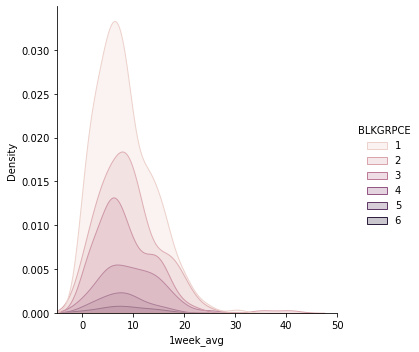

In [227]:
#visualization by Census block group FIPS code in which CBG resides
ax = sns.displot(df, x="1week_avg", hue="BLKGRPCE", kind="kde", fill=True)
ax.set(xlim=(-5, 50))


In [59]:
dfout['model'].value_counts()


PMS5003+PMS5003+BME280    469
PMS5003+BME280+PUB          5
Name: model, dtype: int64

In [60]:
droplist = ['CBSA', 'CSA_Name', 'CSA', 'CBSA_Name', 'COUNTYFP', 'STATEFP',
            'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK', 'D1_FLAG', 'is_owner', 'downgraded', 'flagged', 'hidden', 'location_type']

In [61]:
dfout.drop(columns=droplist, inplace=True)

/Users/airtonkamdem/.pyenv/versions/3.9.4/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
dfout.sample(3)

,id,lat,lon,name,pm_2.5,temp_f,temp_c,humidity,pressure,last_seen,model,age,10min_avg,30min_avg,1hour_avg,6hour_avg,1day_avg,1week_avg,fips_id,OBJECTID,GEOID20,TRACTCE,BLKGRPCE,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
560,40755,33.827178,-118.363116,TorrAir 21,7.0,85.0,29.444444,16.0,1015.37,2022-02-12 21:40:43,PMS5003+PMS5003+BME280,0,6.64,6.12,7.95,13.23,10.68,16.30,60376507023,45113,6.037651e+10,650702,3,95.826616,0.0,95.826616,95.826616,1474,522.0,480.0,0.537,12,0.025000,42,0.087500,426,0.887500,647,94,143,410,0.145286,59,5,2,7,28,17,5,2,7,8,17,4,16,0,17,29,13,0.288136,5.447338,15.381948,0.615695,0.052178,0.020871,0.073049,0.292194,0.177404,0.052178,0.020871,0.073049,0.083484,0.177404,0.041742,0.166968,0.0,6.063034,0.122917,0.800927,0.800927,0.895517,0.838011,0.271515,0.441739,0.483792,0.128248,0.076973,0.167139,10.966102,0.000047,24.001353,0.0,5.536008,18.465345,104.675720,0.0,60.108561,13.357458,66.787290,6.678729,241.4,0.000000,0.000000,2.67,17.832207,0.001811,226880,199604,59553,38804,0.000091,0.331473,0.000091,0.388189,3.230000e-05,0.049889,2.870000e-05,0.038727,4,20,15,19,15.333333,2602.326934,3.878047e+05
439,33005,34.093455,-117.705462,OHA_test,0.5,97.0,36.111111,4.0,978.59,2022-02-12 21:39:50,PMS5003+PMS5003+BME280,1,0.36,0.56,1.17,3.16,3.88,10.56,60374020023,48991,6.037402e+10,402002,3,172.585512,0.0,172.585512,157.063460,1281,533.0,497.0,0.596,9,0.018109,117,0.235412,371,0.746479,587,146,157,284,0.248722,87,1,2,1,71,12,1,2,1,15,12,0,56,0,27,47,13,0.310345,3.393533,8.155939,0.553916,0.006367,0.012734,0.006367,0.452047,0.076402,0.006367,0.012734,0.006367,0.095503,0.076402,0.000000,0.356544,0.0,3.947449,0.175050,0.390502,0.390502,0.585621,0.504603,0.287176,0.458129,0.508741,0.371513,0.127193,0.258160,6.747126,0.003192,24.141932,0.0,6.129151,18.012782,123.660901,0.0,18.541533,7.416613,133.499039,14.833227,694.7,0.104447,0.541815,15.67,58.109165,0.012233,207100,200895,494396,258228,0.000083,0.302574,0.000092,0.390700,2.684030e-04,0.414167,1.913110e-04,0.257715,5,8,16,14,12.166667,3920.695963,6.984449e+05
451,34115,33.783364,-118.402983,Palos Verdes Estates,2.5,91.0,32.777778,11.0,994.13,2022-02-12 21:39:43,PMS5003+PMS5003+BME280,1,2.47,2.78,2.71,2.19,1.70,5.86,60376703262,36835,6.037670e+10,670326,2,532.465659,0.0,532.465659,366.604580,1303,636.0,509.0,0.456,0,0.000000,130,0.255403,379,0.744597,852,159,192,501,0.186620,155,22,11,61,40,21,22,11,61,32,21,0,8,0,34,91,30,0.219355,1.734839,3.554238,0.422799,0.060010,0.030005,0.166392,0.109109,0.057282,0.060010,0.030005,0.166392,0.087288,0.057282,0.000000,0.021822,0.0,2.157638,0.304519,0.902329,0.902329,0.882584,0.760483,0.492474,0.580606,0.607995,0.363280,0.212620,0.307845,5.496774,0.011145,15.536951,0.0,2.623673,12.913278,50.501360,0.0,4.807822,4.807822,52.886040,7.211733,332.6,0.000000,0.000000,-99999.00,-99999.000000,-99999.000000,66360,64471,116,635,0.000027,0.096952,0.000029,0.125383,6.300000e-08,0.000097,4.700000e-07,0.000634,10,18,9,17,13.333333,11343.358740,2.154856e+06


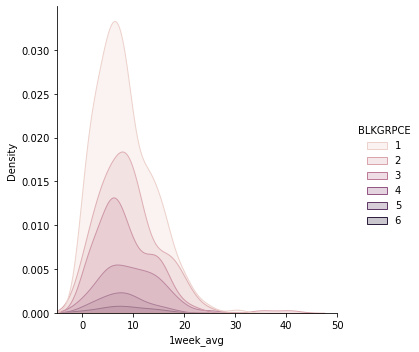

In [63]:
ax = sns.displot(df, x="1week_avg", hue="BLKGRPCE", kind="kde", fill=True)
ax.set(xlim=(-5, 50))


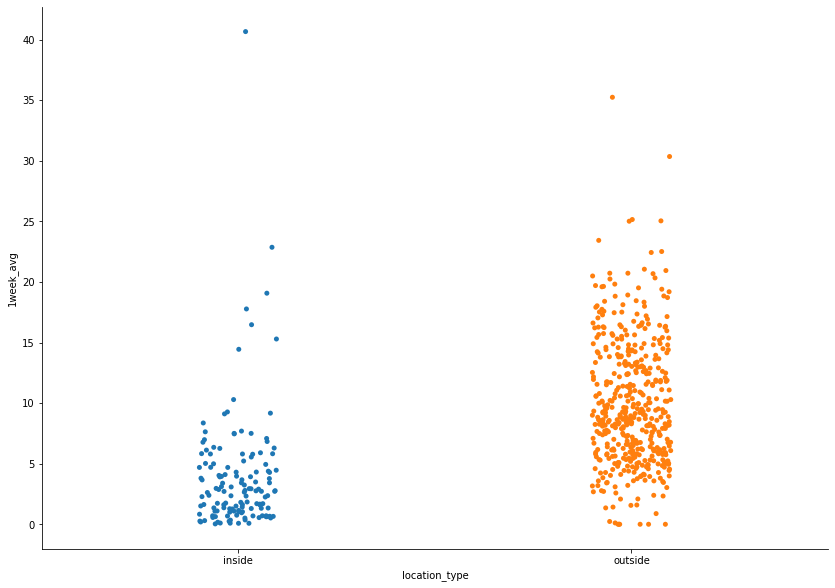

In [64]:
sns.catplot(data=df, x='location_type', y='1week_avg',
            height=8.27, aspect=11.7/8.27)

In [73]:
dfout['Ac_Water'].value_counts()


0.000000       337
0.911058         9
17.336042        3
134.808617       3
0.235486         2
2.358322         2
3962.661651      2
1.863875         2
0.968138         2
130.548860       2
0.256984         2
10.499526        2
0.584639         2
0.980740         2
1.263669         2
7.079168         2
25.051986        2
4.251850         1
4.892580         1
0.335809         1
0.548315         1
54.528545        1
240.492546       1
16.180849        1
62.375700        1
443.011505       1
2.859935         1
0.630105         1
2.134697         1
4.300034         1
0.262173         1
10.077974        1
0.873746         1
1.115162         1
4.222939         1
4.059359         1
60.242239        1
0.055350         1
4.008703         1
0.427483         1
2.136674         1
6.167122         1
3.971885         1
4.682545         1
5.768055         1
1.319020         1
0.258467         1
58.333885        1
13.257903        1
4.034402         1
7.945253         1
32.561108        1
2.322987    

In [71]:
dfout.sample(5)

,id,lat,lon,name,pm_2.5,temp_f,temp_c,humidity,pressure,last_seen,model,age,10min_avg,30min_avg,1hour_avg,6hour_avg,1day_avg,1week_avg,fips_id,OBJECTID,GEOID20,TRACTCE,BLKGRPCE,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
213,56073,34.262388,-118.427199,CCA Kewen and Van Nuys,0.00,104.0,40.000000,3.0,984.57,2022-02-12 21:41:10,PMS5003+PMS5003+BME280,0,0.02,0.03,0.19,3.16,3.09,9.30,60371044041,41703,6.037104e+10,104404,1,67.717755,0.000000,67.717755,67.717755,1182,272.0,272.0,0.631,8,0.029412,72,0.264706,192,0.705882,556,137,270,149,0.246403,209,26,4,33,118,28,26,4,33,88,28,0,30,0,47,92,70,0.224880,4.016672,17.454802,3.086340,0.383947,0.059069,0.487317,1.742527,0.413481,0.383947,0.059069,0.487317,1.299511,0.413481,0.000000,0.443015,0.0,7.103012,0.768382,0.757092,0.757092,0.858700,0.739903,0.677543,0.689659,0.745337,0.633064,0.300503,0.546405,2.660287,0.190084,25.176786,0.000000,3.654297,21.522489,138.655512,0.000000,47.254963,9.450993,75.607941,47.254963,335.28,0.000000,0.000000,12.67,119.744076,0.010719,266326,251287,496975,345461,0.000107,0.389103,0.000115,0.488702,0.000270,0.416328,0.000256,0.344775,16,17,17,17,16.833333,2125.416407,2.740506e+05
309,82569,34.149721,-118.216835,Glenoaks Blvd,0.53,100.0,37.777778,3.0,991.33,2022-02-12 21:40:33,PMS5003+PMS5003+BME280,0,0.17,0.25,0.46,1.57,1.94,7.49,60373009021,52111,6.037301e+10,300902,1,870.935332,1.865111,869.070221,707.369560,812,297.0,297.0,0.502,0,0.000000,59,0.198653,238,0.801347,453,102,100,251,0.225166,85,3,0,0,55,27,3,0,0,46,27,0,9,0,46,30,9,0.541176,0.419865,1.147915,0.120163,0.004241,0.000000,0.000000,0.077753,0.038170,0.004241,0.000000,0.000000,0.065030,0.038170,0.000000,0.012723,0.0,0.540029,0.286195,0.695408,0.474690,0.759107,0.506071,0.504991,0.588633,0.655316,0.892029,0.189521,0.315985,5.329412,0.013175,6.181994,0.966763,0.000000,5.215231,14.488311,1.472838,0.000000,0.000000,16.201222,3.682096,-99999.00,0.000000,0.000000,1.00,0.736419,0.001232,359839,300087,-99999,-99999,0.000145,0.525726,0.000137,0.583608,-99999.000000,-99999.000000,-99999.000000,-99999.000000,10,8,6,1,5.333333,12609.309530,3.524626e+06
329,81219,34.245539,-118.505607,Highland Hall Waldorf School,0.24,90.0,32.222222,8.0,986.52,2022-02-12 21:40:48,PMS5003+PMS5003+BME280,0,0.44,0.44,0.46,0.58,0.72,6.50,60371151011,47982,6.037115e+10,115101,1,319.990052,0.000000,319.990052,319.990052,1922,582.0,565.0,0.611,0,0.000000,61,0.107965,504,0.892035,775,187,180,408,0.241290,453,8,26,24,309,86,8,26,24,98,86,159,52,0,186,139,128,0.410596,1.818807,6.006437,1.415669,0.025001,0.081253,0.075002,0.965655,0.268758,0.025001,0.081253,0.075002,0.306260,0.268758,0.496890,0.162505,0.0,3.234476,0.801770,0.601040,0.601040,0.849757,0.795190,0.623710,0.617712,0.678756,0.581405,0.381474,0.737785,1.710817,0.491243,18.977200,0.000000,2.881556,16.095644,87.362716,0.000000,10.000311,10.000311,70.002176,24.000746,602.16,0.000000,0.000000,2.00,4.000124,0.001041,198895,190108,45807,49348,0.000080,0.290586,0.000087,0.369721,0.000025,0.038374,0.000037,0.049250,14,19,13,15,14.833333,4813.274865,1.294981e+06
358,42265,34.180761,-118.507057,HW O'Malley,0.00,102.0,38.888889,5.0,994.63,2022-02-12 21:19:57,PMS5003+PMS5003+BME280,21,0.01,0.51,1.02,0.89,1.19,7.95,60379800241,4933

### Walkability ranking, and population size plotted against the 1 week averate and temperature, humility and pressure

In [236]:
import plotly.express as px
fig = px.scatter(df, x="1week_avg", y="temp_f", color="NatWalkInd",
                 size='TotPop', hover_data=['HH'])
fig.show()


In [235]:
fig = px.scatter(df, x="1week_avg", y="humidity", color="NatWalkInd",
                 size='TotPop', hover_data=['HH'])
fig.show()


In [234]:
fig = px.scatter(df, x="1week_avg", y="pressure", color="NatWalkInd",
                 size='TotPop', hover_data=['HH'])
fig.show()


### Impact of land area

In [233]:
#unprotected land size (not parks etc. )
fig = px.scatter(df, x="1week_avg", y="temp_f", color="NatWalkInd",
                 size='Ac_Unpr', hover_data=['D4A_Ranked'])
fig.show()


In [232]:
#total land size (acres )
fig = px.scatter(df, x="1week_avg", y="temp_f", color="NatWalkInd",
                 size='Ac_Land', hover_data=['D4A_Ranked'])
fig.show()


In [231]:
#total water size (acres )
fig = px.scatter(df, x="1week_avg", y="temp_f", color="NatWalkInd",
                 size='Ac_Water', hover_data=['D4A_Ranked'])
fig.show()


### Impact by employment

In [230]:
#high wage employment (big bubbles )
fig = px.scatter(df, x="1week_avg", y="TotEmp", log_y=True, color="NatWalkInd",
                 size='R_HiWageWk', hover_data=['D4A_Ranked'])
fig.show()


# STRONG VISUAL

In [229]:
#road network density  ######## bigger bubbles have more jobs within a 45 minute travel time
fig = px.scatter(df, x="1week_avg", y="D3A", color="NatWalkInd",
                 size='D5AR', hover_data=['D4A_Ranked'])
fig.show()


In [237]:
#road network density - bigger bubbles are higher wages
fig = px.scatter(df, x="1week_avg", y="D3A", color="NatWalkInd",
                 size='R_HiWageWk', hover_data=['D4A_Ranked'])
fig.show()


In [146]:
dfout.sample(5)


,id,lat,lon,name,pm_2.5,temp_f,temp_c,humidity,pressure,last_seen,model,age,10min_avg,30min_avg,1hour_avg,6hour_avg,1day_avg,1week_avg,fips_id,OBJECTID,GEOID20,TRACTCE,BLKGRPCE,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
611,96793,33.872117,-118.129279,zev patio,0.00,95.0,35.000000,8.0,1017.12,2022-02-12 21:39:56,PMS5003+PMS5003+BME280,1,0.01,0.42,2.61,11.37,10.71,17.03,60375544042,52662,6.037554e+10,554404,2,128.297532,0.000000,128.297532,128.297532,2781,979.0,881.0,0.621,19,0.021566,278,0.315551,584,0.662883,1346,299,504,543,0.222140,472,34,118,77,221,22,34,26,77,58,22,0,163,92,114,168,190,0.241525,7.630700,21.676177,3.678948,0.265009,0.919737,0.600167,1.722558,0.171476,0.265009,0.202654,0.600167,0.452074,0.171476,0.000000,1.270484,0.717083,11.309649,0.535755,0.826411,0.826411,0.889763,0.832626,0.619911,0.615384,0.660931,0.931952,0.290194,0.519252,2.851695,0.156971,15.175784,0.023167,4.943283,10.209333,34.923821,0.000000,9.976809,9.976809,4.988405,14.965214,592.78,0.0,0.000000,1.67,8.330636,0.000601,412056,397133,71032,66786,0.000166,0.602015,0.000182,0.772342,0.000039,0.059505,0.000049,0.066653,14,20,8,15,13.333333,2900.088344,5.192133e+05
328,85621,33.859295,-118.387197,Hermosa Hill,6.97,103.0,39.444444,9.0,1012.34,2022-02-12 21:40:33,PMS5003+PMS5003+BME280,0,8.71,7.27,8.02,15.95,12.27,15.97,60376211022,44733,6.037621e+10,621102,2,80.475528,0.000000,80.475528,79.016590,1746,849.0,722.0,0.695,28,0.038781,154,0.213296,540,0.747922,896,169,166,561,0.188616,166,36,22,29,30,49,36,22,29,25,49,0,5,0,56,58,52,0.337349,10.744579,22.096626,2.100825,0.455601,0.278423,0.367012,0.379667,0.620123,0.455601,0.278423,0.367012,0.316389,0.620123,0.000000,0.063278,0.000000,12.845404,0.229917,0.977643,0.977643,0.923608,0.795830,0.433031,0.564104,0.611840,0.364544,0.173640,0.312618,5.397590,0.012307,32.446262,0.000000,7.629702,24.816560,265.207580,0.000000,95.432738,0.000000,254.487302,31.810913,386.24,0.0,0.000000,2.33,18.529857,0.001334,237355,205641,165420,167650,0.000096,0.346777,0.000094,0.399930,0.000090,0.138576,0.000124,0.167317,8,19,20,17,16.833333,2346.432769,3.256817e+05
289,12669,33.795900,-118.348450,Eleda Drive,1.96,94.0,34.444444,6.0,1011.37,2022-02-12 21:40:14,PMS5003+PMS5003+BME280,1,1.39,1.78,2.58,3.69,2.89,6.74,60376514023,37028,6.037651e+10,651402,3,211.369587,0.292319,211.077268,198.701380,2277,758.0,737.0,0.586,24,0.032564,110,0.149254,603,0.818182,998,179,234,585,0.179359,835,93,96,34,572,40,93,96,34,267,40,33,272,0,134,320,381,0.160479,3.814770,11.459407,4.202286,0.468039,0.483137,0.171111,2.878692,0.201307,0.468039,0.483137,0.171111,1.343725,0.201307,0.166078,1.368888,0.000000,8.017056,1.132972,0.638849,0.638849,0.835954,0.782273,0.690576,0.597141,0.656283,0.533104,0.536632,0.911075,1.195210,0.822662,23.101338,1.240703,3.880909,17.979726,110.203435,3.032065,24.256520,12.128260,90.961951,21.224455,521.70,0.0,0.000000,5.33,16.160907,0.002341,201016,185067,72475,69337,0.000081,0.293685,0.000085,0.359917,0.000039,0.060714,0.000051,0.069199,16,18,15,15,15.666667,5200.129350,8.553983e+05
281,87455,34.144860,-117.994088,East Olive Avenue,0.00,90.0,32.222222,4.0,999.32,2022-02-12 21:41:08,PMS5003+PMS5003+BME280,0,0.48,0.47,0.57,2.02,2.66,8.43,60374311001,52774,6.0374

In [162]:
dfout['BLKGRPCE'].value_counts()


plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()


1    210
2    125
3     75
4     45
5     14
6      5
Name: BLKGRPCE, dtype: int64

<AxesSubplot:xlabel='BLKGRPCE', ylabel='TotPop'>

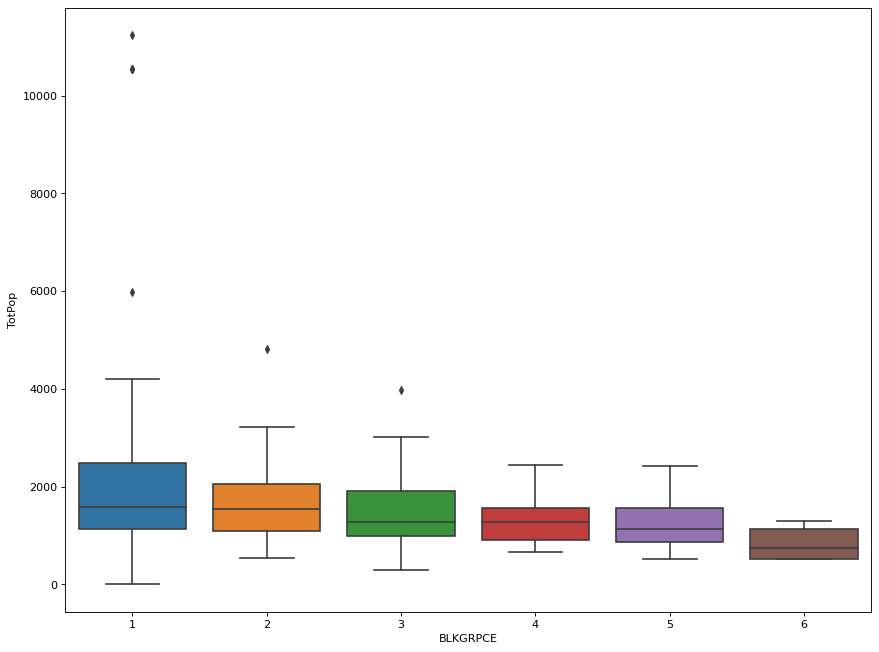

In [165]:
plt.figure(figsize=(13, 10), dpi=80)
sns.boxplot(x='BLKGRPCE', y='TotPop', data=dfout, notch=False)


<AxesSubplot:xlabel='BLKGRPCE', ylabel='1week_avg'>

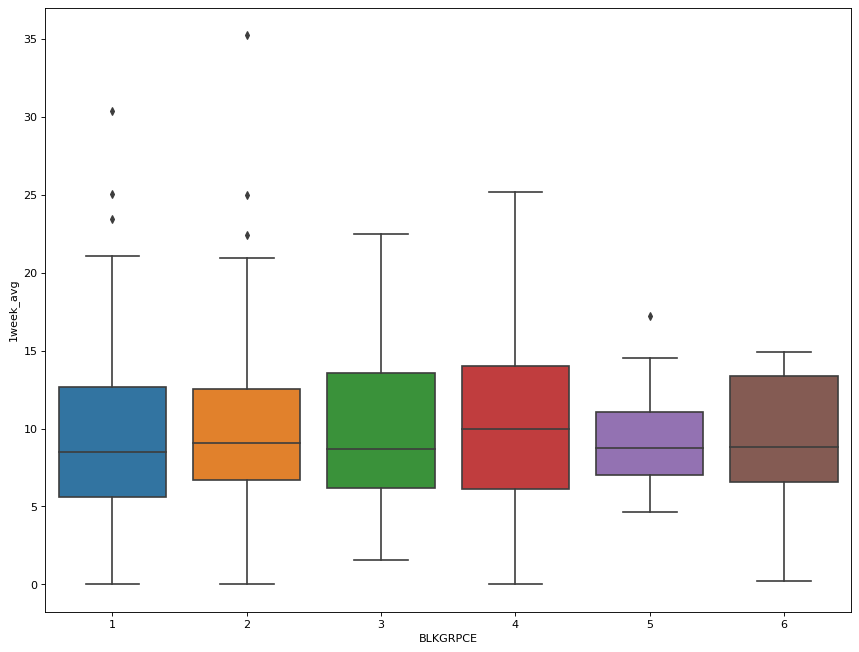

In [163]:
plt.figure(figsize=(13, 10), dpi=80)
sns.boxplot(x='BLKGRPCE', y='1week_avg', data=dfout, notch=False)


<AxesSubplot:xlabel='BLKGRPCE', ylabel='R_HiWageWk'>

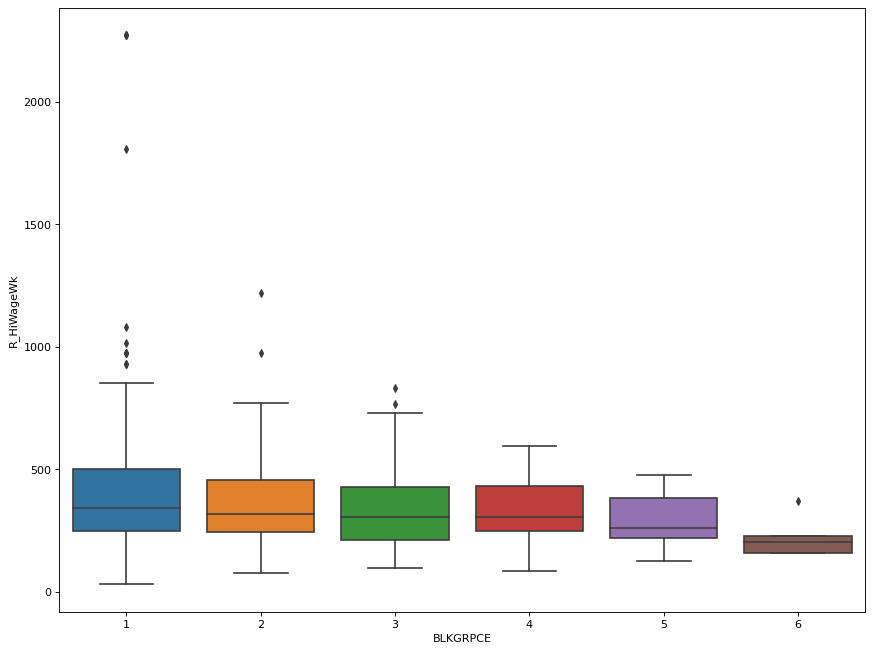

In [169]:
plt.figure(figsize=(13, 10), dpi=80)
sns.boxplot(x='BLKGRPCE', y='R_HiWageWk', data=dfout, notch=False)


<AxesSubplot:xlabel='BLKGRPCE', ylabel='E_PctLowWage'>

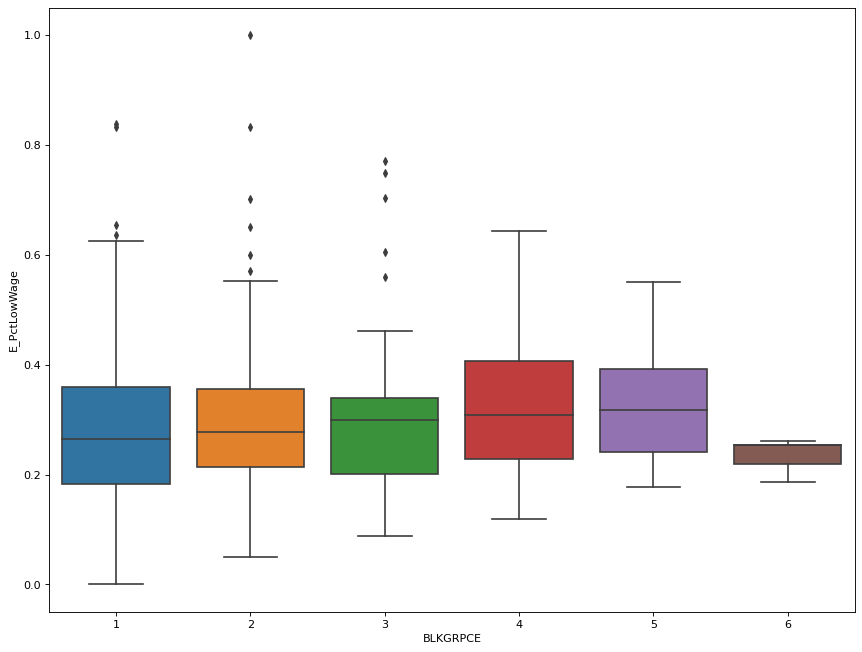

In [170]:

plt.figure(figsize=(13, 10), dpi=80)
sns.boxplot(x='BLKGRPCE', y='E_PctLowWage', data=dfout, notch=False)


<AxesSubplot:xlabel='BLKGRPCE', ylabel='NatWalkInd'>

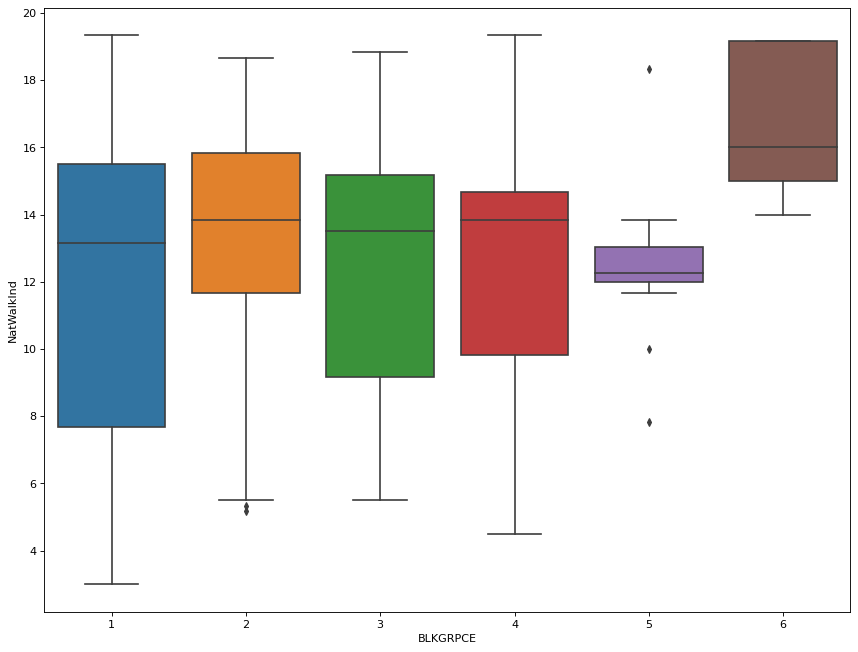

In [238]:

#walkable blocks
plt.figure(figsize=(13, 10), dpi=80)
sns.boxplot(x='BLKGRPCE', y='NatWalkInd', data=dfout, notch=False)


<AxesSubplot:xlabel='BLKGRPCE', ylabel='NatWalkInd'>

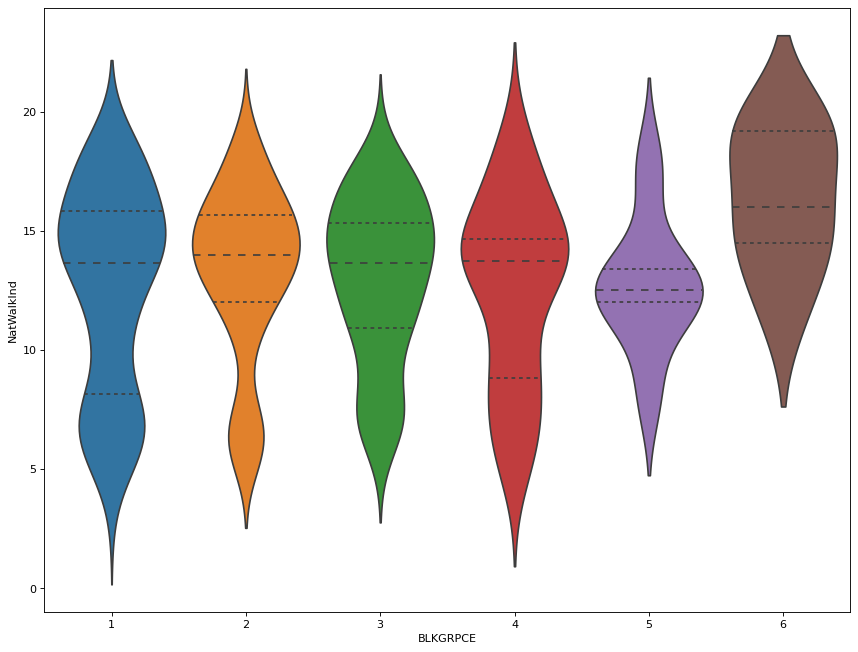

In [239]:
# Draw Plot
plt.figure(figsize=(13, 10), dpi=80)
sns.violinplot(x='BLKGRPCE', y='NatWalkInd', data=df,
               scale='width', inner='quartile')


In [186]:
df2 = pd.read_csv('./LA_data/air_walk_merged_LA.csv',parse_dates=['last_seen'])

In [214]:
from datetime import datetime

In [215]:
df2['time'] = pd.to_datetime(df['last_seen'],unit='ns')

In [216]:
df2['time']


0     2022-02-12 21:40:46
1     2022-02-12 21:40:24
2     2022-02-12 21:41:08
3     2022-02-12 21:39:47
4     2022-02-12 21:39:51
5     2022-02-12 21:40:29
6     2022-02-12 21:40:34
7     2022-02-12 21:40:09
8     2022-02-12 21:40:10
9     2022-02-12 21:40:37
10    2022-01-18 01:39:32
11    2022-02-12 21:39:41
12    2022-02-12 21:40:54
13    2022-02-12 21:39:56
14    2022-02-12 21:39:43
15    2022-02-12 21:41:07
16    2022-02-12 21:39:57
17    2022-02-12 21:39:58
18    2022-02-12 21:40:08
19    2022-02-12 21:40:13
20    2022-02-12 21:39:31
21    2022-02-12 21:40:06
22    2022-02-12 21:40:15
23    2022-02-12 21:40:08
24    2022-02-12 21:39:57
25    2022-02-12 21:41:13
26    2022-02-12 21:41:22
27    2022-02-12 21:40:38
28    2022-02-12 21:41:22
29    2022-02-12 21:41:07
30    2022-02-12 21:40:06
31    2022-02-12 21:39:37
32    2022-02-12 21:40:29
33    2022-02-12 21:41:08
34    2022-02-12 21:41:16
35    2022-02-12 21:39:53
36    2022-02-12 21:39:55
37    2022-02-12 21:40:39
38    2022-0

In [219]:
df2['time'].value_counts()

2022-02-12 21:41:22    12
2022-02-12 21:40:33    11
2022-02-12 21:40:52    10
2022-02-12 21:39:37     9
2022-02-12 21:41:11     8
2022-02-12 21:40:40     8
2022-02-12 21:41:19     8
2022-02-12 21:40:24     8
2022-02-12 21:40:26     8
2022-02-12 21:40:29     8
2022-02-12 21:39:31     7
2022-02-12 21:40:01     7
2022-02-12 21:40:32     7
2022-02-12 21:40:27     7
2022-02-12 21:40:15     7
2022-02-12 21:39:34     7
2022-02-12 21:40:09     7
2022-02-12 21:39:43     7
2022-02-12 21:40:19     7
2022-02-12 21:41:23     6
2022-02-12 21:40:23     6
2022-02-12 21:40:04     6
2022-02-12 21:41:24     6
2022-02-12 21:40:21     6
2022-02-12 21:39:38     6
2022-02-12 21:40:50     6
2022-02-12 21:41:01     6
2022-02-12 21:40:03     6
2022-02-12 21:40:53     6
2022-02-12 21:40:58     6
2022-02-12 21:41:03     6
2022-02-12 21:40:38     6
2022-02-12 21:41:14     6
2022-02-12 21:39:59     6
2022-02-12 21:41:21     6
2022-02-12 21:40:13     6
2022-02-12 21:39:57     6
2022-02-12 21:39:56     6
2022-02-12 2